In [1]:
# libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

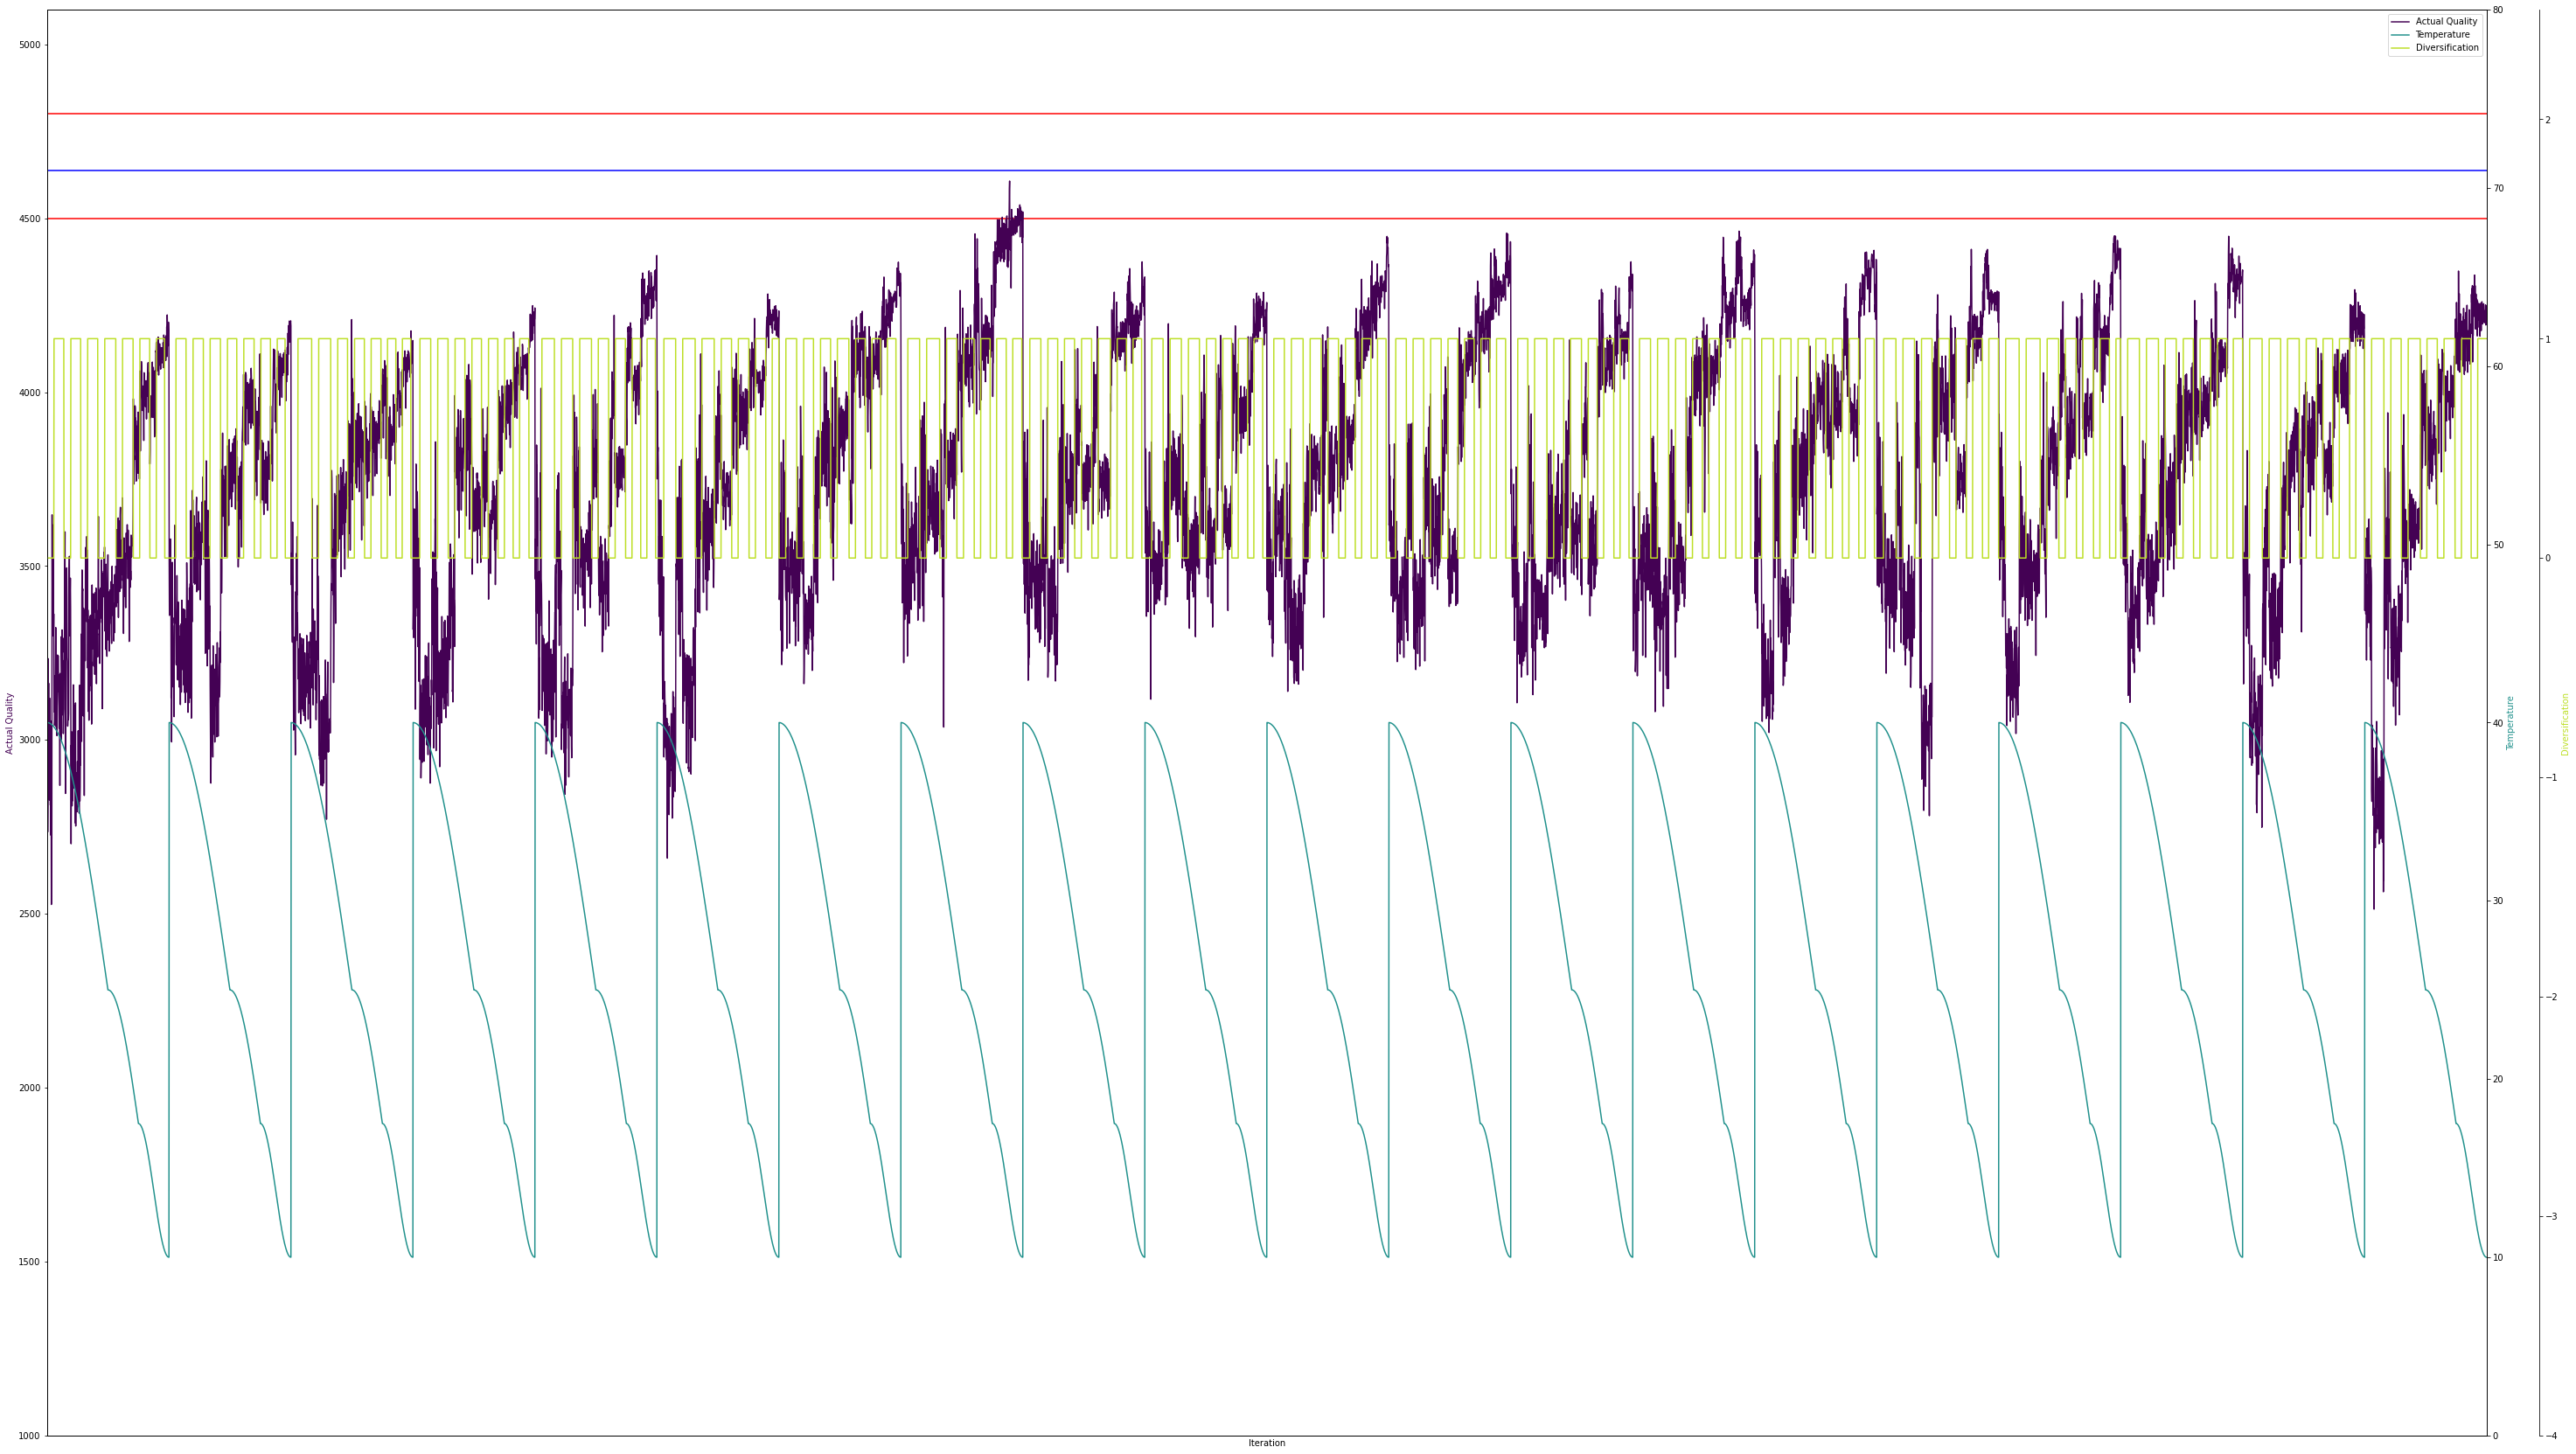

In [71]:
df = pd.read_csv ('data.csv')
it = df["it"]
temp = df["temp"]
actualQ = df["actualQ"]
bestQ = df["bestQ"]
pAvg = df["pAvg"]
diversification = df["intensification"]
bQ = df["bestQ"][len(df["bestQ"])-1]
nIt = df["it"][len(df["it"])-1]

fig = plt.figure(figsize=(50,30))
plt.axhline(y=4500, color='r', linestyle='-')
plt.axhline(y=4800, color='r', linestyle='-')
plt.axhline(y=bQ, color='b', linestyle='-')
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
#par3 = host.twinx()

host.set_xlim(0, nIt)
host.set_ylim(1000, 5100)
par1.set_ylim(0, 80)
par2.set_ylim(-4, 2.5)
#par3.set_ylim(0, 20)

host.set_xlabel("Iteration")
host.set_ylabel("Actual Quality")
par1.set_ylabel("Temperature")
par2.set_ylabel("Intensification")
#par3.set_ylabel("Prob Downgrade")


color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)
#color4 = plt.cm.viridis(0.2)

p1, = host.plot(it, actualQ, color=color1,label="Actual Quality")
p2, = par1.plot(it, temp, color=color2, label="Temperature")
p3, = par2.plot(it, diversification, color=color3, label="Intensification")
#p4, = par3.plot(it, pAvg, color=color4, label="Prob Downgrade")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
#par3.yaxis.label.set_color(p4.get_color())

plt.savefig("plot-solution-quality.png", bbox_inches='tight')